# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(['Unnamed: 0'], axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
heroes_df.describe(include='all')

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
count,734,734,734,734,734,734.000000,719,734,734,732.000000
unique,715,3,23,62,30,NaN,24,17,4,NaN
top,Spider-Man,Male,blue,-,-,NaN,Marvel Comics,-,good,NaN
freq,3,505,225,304,172,NaN,388,662,496,NaN
mean,NaN,NaN,NaN,NaN,NaN,102.254087,NaN,NaN,NaN,43.855191
std,NaN,NaN,NaN,NaN,NaN,139.624543,NaN,NaN,NaN,130.823733
min,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,NaN,-99.000000
25%,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,NaN,-99.000000
50%,NaN,NaN,NaN,NaN,NaN,175.000000,NaN,NaN,NaN,62.000000
75%,NaN,NaN,NaN,NaN,NaN,185.000000,NaN,NaN,NaN,90.000000


In [7]:
powers_df.describe(include='all')

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Superboy-Prime,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [8]:
## Checking for null values in the Hero Dataset
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
# investigating the type of publishers that are listed
heroes_df.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Shueisha               4
ABC Studios            4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
Microsoft              1
Universal Studios      1
J. R. R. Tolkien       1
South Park             1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Name: Publisher, dtype: int64

In [10]:
heroes_df[(heroes_df['Publisher'].isnull() | heroes_df['Weight'].isnull())]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [11]:
# We can see that along with the two Weight valuables that are NaN their appears to be a placeholder value being used
# for unknown weight, as such we sill use this for out two NaN weights

In [12]:
heroes_df.Weight.value_counts(normalize=True).head()

-99.0    0.323770
 79.0    0.031421
 54.0    0.031421
 81.0    0.030055
 90.0    0.025956
Name: Weight, dtype: float64

In [13]:
heroes_df.Height.value_counts(normalize=True).head()

-99.0     0.295640
 183.0    0.080381
 188.0    0.069482
 178.0    0.053134
 180.0    0.051771
Name: Height, dtype: float64

In [14]:
# After Identifying that the heroes don't align to a particular universe, we create a None publisher category to house
# deleting Chuck Norris would end up incurring a roundhouse kick to the face

# Having checked the hight and weight varialbes and identified that the vast majority of weights are labeled -99
# It would be fair to assume that these two columns do not provide any predictive information for the data set
# We would either keep them as is or drop the two columns all together

heroes_df.Publisher.fillna(value='None',inplace=True)
heroes_df.Weight.fillna(value=-99.0, inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [15]:
#Check to make sure the new values were properly added
heroes_df.Weight.value_counts().head()

-99.0    239
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64

In [16]:
# Finally we check for duplicate values
duplicates = heroes_df[heroes_df.duplicated()]
print(len(duplicates))
duplicates.head()

1


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [17]:
# Checking what the duplicate values contain
heroes_df[heroes_df['name'] == 'Goliath']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [18]:
# Dropping duplicated values using the index
heroes_df.drop([289, 290], inplace=True)

In [19]:
# Checking to see if all duplicated have been removed
duplicates = heroes_df[heroes_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [20]:
# Checking powers
powers_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
hero_names                      object
Agility                         bool
Accelerated Healing             bool
Lantern Power Ring              bool
Dimensional Awareness           bool
Cold Resistance                 bool
Durability                      bool
Stealth                         bool
Energy Absorption               bool
Flight                          bool
Danger Sense                    bool
Underwater breathing            bool
Marksmanship                    bool
Weapons Master                  bool
Power Augmentation              bool
Animal Attributes               bool
Longevity                       bool
Intelligence                    bool
Super Strength                  bool
Cryokinesis                     bool
Telepathy                       bool
Energy Armor                    bool
Energy Blasts                   bool
Duplication                     bool
Size

In [21]:
## checking for duplicate entries
duplicates = powers_df[powers_df.duplicated()]
duplicates.head(), len(duplicates)

(Empty DataFrame
 Columns: [hero_names, Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awareness, Cold Resistance, Durability, Stealth, Energy Absorption, Flight, Danger Sense, Underwater breathing, Marksmanship, Weapons Master, Power Augmentation, Animal Attributes, Longevity, Intelligence, Super Strength, Cryokinesis, Telepathy, Energy Armor, Energy Blasts, Duplication, Size Changing, Density Control, Stamina, Astral Travel, Audio Control, Dexterity, Omnitrix, Super Speed, Possession, Animal Oriented Powers, Weapon-based Powers, Electrokinesis, Darkforce Manipulation, Death Touch, Teleportation, Enhanced Senses, Telekinesis, Energy Beams, Magic, Hyperkinesis, Jump, Clairvoyance, Dimensional Travel, Power Sense, Shapeshifting, Peak Human Condition, Immortality, Camouflage, Element Control, Phasing, Astral Projection, Electrical Transport, Fire Control, Projection, Summoning, Enhanced Memory, Reflexes, Invulnerability, Energy Constructs, Force Fields, Self-Sustenance, An

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [22]:
len(powers_df), len(heroes_df)

(667, 732)

In [23]:
powers_df['hero_names'].isin(heroes_df['name']).value_counts()

True     643
False     24
Name: hero_names, dtype: int64

In [24]:
powers_df[powers_df['hero_names'].isin(heroes_df['name']) == False]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54,Bananaman,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
84,Bizarro-Girl,True,True,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,True,False,False
96,Black Vulcan,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
113,Blue Streak,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119,Bradley,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159,Clayface,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
163,Concrete,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,Dementor,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,Doctor Poison,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
full_heroes = pd.merge(powers_df, heroes_df, how='inner', left_on='hero_names', right_on='name')
full_heroes.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,False,True,False,False,False,True,False,False,False,...,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,True,True,False,False,True,True,False,False,False,...,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,False,False,True,False,False,False,False,False,False,...,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,False,True,False,False,False,False,False,False,False,...,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,False,False,False,True,False,False,False,False,True,...,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [26]:
full_heroes.drop('name', axis=1, inplace=True)
full_heroes.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,False,True,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,False,False,False,True,False,False,False,False,True,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [27]:
male_hero = full_heroes[full_heroes['Gender'] == 'Male']
female_hero = full_heroes[full_heroes['Gender'] == 'Female']

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [28]:
# Assummption, all weights/hieghts bellow 0 are are actually placeholder values for N/A

def show_distplot(dataframe, gender, column_name):
    
    sns.distplot(dataframe[(dataframe['Gender'] == gender)& (dataframe[column_name] >=0)][column_name], kde=False, axlabel=column_name)
    plt.ylabel('Count')
    plt.title('{} distribution for {} heroes'.format(column_name,gender))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


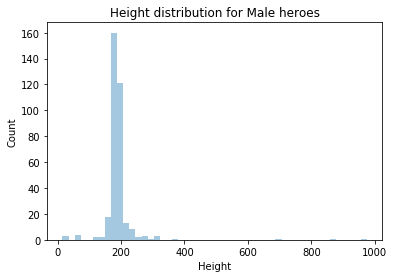

In [29]:
# Male Height
show_distplot(full_heroes,'Male','Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


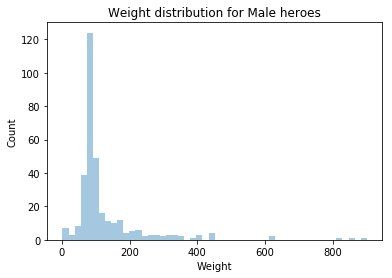

In [30]:
# Male Weight
show_distplot(full_heroes,'Male','Weight')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


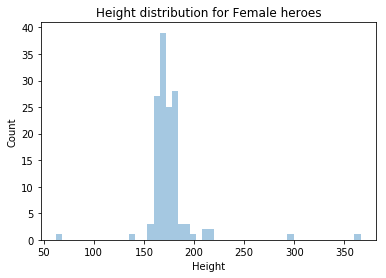

In [31]:
# Female Height
show_distplot(full_heroes,'Female','Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


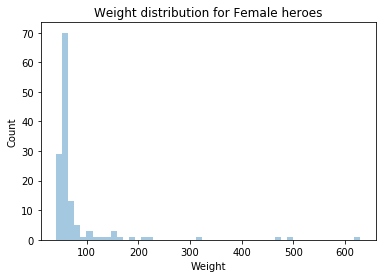

In [32]:
# Female Weight
show_distplot(full_heroes, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [52]:
power_count = {}
for col in full_heroes.columns.values:
    count = full_heroes[col].values.sum()
    if isinstance(count, np.int64):
        power_count.update({col:count})
power_count

{'Agility': 244,
 'Accelerated Healing': 181,
 'Lantern Power Ring': 11,
 'Dimensional Awareness': 25,
 'Cold Resistance': 49,
 'Durability': 262,
 'Stealth': 132,
 'Energy Absorption': 77,
 'Flight': 212,
 'Danger Sense': 34,
 'Underwater breathing': 23,
 'Marksmanship': 124,
 'Weapons Master': 107,
 'Power Augmentation': 8,
 'Animal Attributes': 26,
 'Longevity': 116,
 'Intelligence': 158,
 'Super Strength': 362,
 'Cryokinesis': 20,
 'Telepathy': 92,
 'Energy Armor': 8,
 'Energy Blasts': 148,
 'Duplication': 17,
 'Size Changing': 55,
 'Density Control': 15,
 'Stamina': 294,
 'Astral Travel': 4,
 'Audio Control': 8,
 'Dexterity': 6,
 'Omnitrix': 1,
 'Super Speed': 251,
 'Possession': 7,
 'Animal Oriented Powers': 41,
 'Weapon-based Powers': 62,
 'Electrokinesis': 20,
 'Darkforce Manipulation': 9,
 'Death Touch': 7,
 'Teleportation': 70,
 'Enhanced Senses': 91,
 'Telekinesis': 61,
 'Energy Beams': 42,
 'Magic': 44,
 'Hyperkinesis': 1,
 'Jump': 66,
 'Clairvoyance': 5,
 'Dimensional Trav

In [48]:
power_count = {}
for col in full_heroes.columns.values:
    count = full_heroes[col].values.sum()
    if isinstance(count, np.int64):
        power_count.update(col = count)
power_count
# sorted_powers = sorted(power_count.items(), key=lambda x: x[1], reverse=True)[:5]
# power_name = [i[0] for i in sorted_powers]
# power_values = [i[1] for i in sorted_powers]

# bar_spacing = np.arange(len(power_name))
# plt.bar(bar_spacing, power_values, align='center')
# plt.xticks(bar_spacing, power_name)
# plt.title("Top {} powers for {} Heroes".format(5, 'all'))
# plt.show()
power_count

{'col': 2}

In [56]:
def common_powers(dataframe, number, publisher = 'All', top=True):
    power_count = {}
    
    if publisher == 'All':
        for col in dataframe.columns.values:
            count = dataframe[col].values.sum()
            if isinstance(count, np.int64):
                power_count.update({col:count})
    else:
        df = dataframe[dataframe['Publisher'] == publisher]
        for col in df.columns.values:
            count = df[col].values.sum()
            if isinstance(count, np.int64):
                power_count.update({col:count})
                
    sorted_powers = sorted(power_count.items(), key=lambda x: x[1], reverse=True)[:number]
    power_name = [i[0] for i in sorted_powers]
    power_values = [i[1] for i in sorted_powers]
    
    bar_spacing = np.arange(len(power_name))
    plt.bar(bar_spacing, power_values, align='center')
    plt.xticks(bar_spacing, power_name)
    plt.title("Top {} powers for {} Heroes".format(number, publisher))
    plt.show()
    
    return sorted_powers

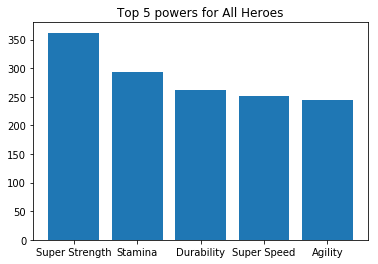

In [57]:
all_top5_powers = common_powers(full_heroes, 5)

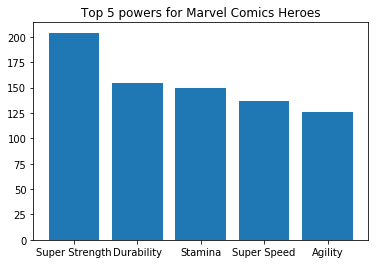

In [58]:
marvel_top5_powers = common_powers(full_heroes, 5, publisher='Marvel Comics')

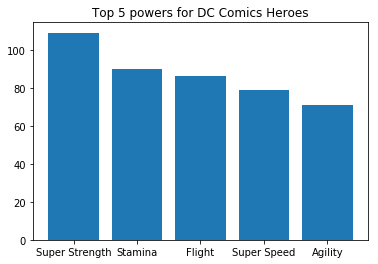

In [60]:
dc_top5_powers =common_powers(full_heroes, 5, publisher='DC Comics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [96]:
def power_likelyhood(dataframe, power_a, gender ,power_b = 'All', return_max=True):
    
    if gender:
        df = dataframe[(dataframe[power_a] == True) & (dataframe['Gender'] == gender)].drop(power_a, axis=1)
        power_overlap = {}
        for col in df.columns.values:
            count = df[col].values.sum()
            if isinstance(count, np.int64):
                percent_overlap = count/len(df)
                power_overlap.update({col:percent_overlap})
    else:
        df = dataframe[(dataframe[power_a] == True)].drop(power_a, axis=1)
        power_overlap = {}
        for col in df.columns.values:
            count = df[col].values.sum()
            if isinstance(count, np.int64):
                percent_overlap = count/len(df)
                power_overlap.update({col:percent_overlap})
        
    
    overlap_sorted = sorted(power_overlap.items(), key=lambda x: x[1], reverse=True)
    
    return overlap_sorted
        

In [99]:
power_likelyhood(full_heroes, 'Agility', 'Female')[:1]

[('Super Strength', 0.696969696969697)]

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data